In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [22]:
data = np.loadtxt(fname='/content/data4.csv',delimiter=',',skiprows=1)
data.shape

(600, 2)

In [23]:
x1 = data[:,0]
x2 = data[:,1]

[]

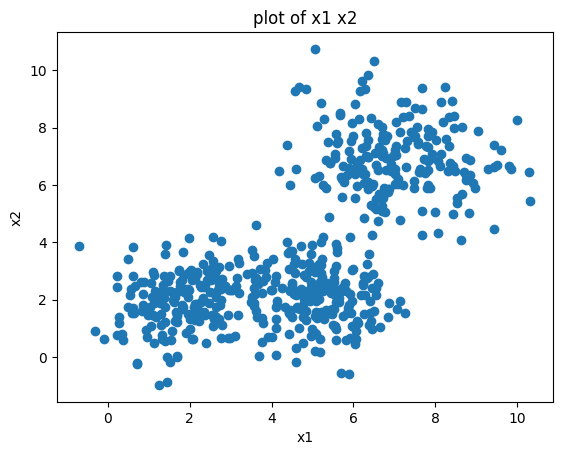

In [24]:
plt.scatter(x1,x2)
plt.title('plot of x1 x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot()

In [30]:
class kmean:
	def __init__(self,n,p,k,data):
		self.n=n
		self.p=p
		self.k=k
		self.data=data
		self.bjk=np.inf
		self.best_cen=None
		self.best_grp=None

	def run(self):
		for _ in range(100):
			cen=np.zeros((self.k,self.p))
			mins=self.data.min(axis=0)
			maxs=self.data.max(axis=0)
			for i in range(self.k):
				for j in range(self.p):
					cen[i][j]=mins[j]+(maxs[j]-mins[j])*rn.random()
			grp=np.zeros(self.n,dtype=int)
			while True:
				dists=np.zeros((self.n,self.k))
				for i in range(self.n):
					for j in range(self.k):
						dists[i,j]=np.sqrt(np.sum((self.data[i]-cen[j])**2))
				newgrp=np.argmin(dists,axis=1)
				if np.array_equal(grp,newgrp):
					break
				grp=newgrp
				for ki in range(self.k):
					pts=self.data[grp==ki]
					if len(pts)>0:
						cen[ki]=np.mean(pts,axis=0)

			jk=sum(np.linalg.norm(self.data[i]-cen[grp[i]])**2 for i in range(self.n))
			if jk<self.bjk:
				self.bjk=jk
				self.best_cen=cen.copy()
				self.best_grp=grp.copy()
		self.nks=[np.count_nonzero(self.best_grp==ki) for ki in range(self.k)]
		self.dks=[np.max(np.linalg.norm(self.data[self.best_grp==ki]-self.best_cen[ki],axis=1)) if np.any(self.best_grp==ki) else 0 for ki in range(self.k)]

#Note: I got some help from Google and Copilot - but NO copy paste. I didn't know about certain functions existing in NumPy so used it to get the right functions - NOT COPY CODE. I thought I shoould mention it, so I have.

In [34]:
ks=range(2,11)
bjks=[]

for k2 in ks:
	model1=kmean(600,2,k2,data)
	model1.run()
	bjks.append(model1.bjk)

plt.plot(ks,bjks,marker='o')
plt.xlabel('k')
plt.ylabel('bjk')
plt.title('k vs bjk')
plt.grid(True)
plt.show()
# this is not all the work but most is done - I was told to submit what I could do by 5pm

KeyboardInterrupt: 